# Importar Librerías Necesarias
Importar las librerías necesarias como pandas, numpy, matplotlib, seaborn, sklearn, y nltk.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from io import StringIO

# Descargar recursos necesarios de nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


False

# Leer Archivos de Datos
Leer los archivos cellphones_train.json y cellphones_test.json y crear los conjuntos de entrenamiento y prueba.

In [30]:
# Leer Archivos de Datos

# Leer los archivos JSON línea por línea y concatenar en un DataFrame
def read_json_lines(file_path):
	data = []
	with open(file_path, 'r') as file:
		for line in file:
			data.append(pd.read_json(StringIO(line), lines=True))
	return pd.concat(data, ignore_index=True)

train_data = read_json_lines('cellphones_train.json')
test_data = read_json_lines('cellphones_test.json')

# Mostrar las primeras filas de los datos de entrenamiento y prueba
print(train_data.head())
print(test_data.head())

# Crear conjuntos de entrenamiento y prueba
X_train = train_data['text']
y_train = train_data['klass']
X_test = test_data['text']
y_test = test_data['klass']

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1004)

# Mostrar la forma de los conjuntos de datos
print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}')
print(f'Tamaño del conjunto de validación: {X_val.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}')

           categories                                id        klass  \
0  [ "DEVICE", "OS" ]  d0fb202ea47c3cad448ea4e5e31bd404  information   
1        [ "MOBILE" ]  d76f590d27f8eb415696e945f16b7e1c      neutral   
2            [ "OS" ]  e345247011f2e69ca73ee5493c35e599     positive   
3            [ "OS" ]  550f607acddf50d8dd515a750b994820  information   
4        [ "MOBILE" ]  29e388d45111200b6535f1367c501461      neutral   

                                                text     type  
0  RT @matukpuntocom: Xperia Play se quedará sin ...   Xperia  
1  RT @AlbertoCiurana: Hay gente que se desconect...  Celular  
2  @loneliest_star siiiiiiiiiiiiiiii!!! y ya podr...  Android  
3  El otro día soné que desarrollaba Apps para An...  Android  
4  Escuchandola con Aristegui, lleva amistad BUEN...  Celular  
     categories                                id        klass  \
0  [ "MOBILE" ]  0b4783023036948eed8f9f1151b708d8  information   
1  [ "MOBILE" ]  fee4741dac44bf014b29c51b8d624d82  

# Preprocesar Texto
Realizar preprocesamiento del texto, incluyendo la eliminación de stopwords, tokenización, y lematización.

In [36]:
import re

# Preprocesar Texto

# Definir función de preprocesamiento
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar caracteres especiales
    text = re.sub(r'\W', ' ', text)
    # Tokenizar el texto
    tokens = word_tokenize(text)
    # Eliminar stopwords
    tokens = [word for word in tokens if word not in stopwords.words('spanish')]
    # Stemming de tokens
    stemmer = nltk.SnowballStemmer('spanish')
    tokens = [stemmer.stem(word) for word in tokens]
    # Unir tokens en una sola cadena
    return ' '.join(tokens)

# Convertir todos los valores a cadenas
X_train = X_train.astype(str)
X_val = X_val.astype(str)
X_test = X_test.astype(str)

# Aplicar preprocesamiento a los conjuntos de entrenamiento y prueba
X_train = X_train.apply(preprocess_text)
X_val = X_val.apply(preprocess_text)
X_test = X_test.apply(preprocess_text)

# Mostrar las primeras filas del conjunto de entrenamiento preprocesado
X_train.head()

5269                           blackstar_sot mejor galaxy
4941    rt androidunivers hoy galaxy s iii pon fin hoy...
4754          palabrasquecausandolor extrañ dig ver celul
528     rt guemoprom llevat xperi mini pro sk17 increi...
7071                    donidus pues cre si sol andro n_n
Name: text, dtype: object

# Crear Gráficas de Palabras Comunes
Crear gráficas que muestren las palabras más comunes para cada una de las etiquetas usando matplotlib y seaborn.

/var/folders/v3/6n107fw10yb9ryc5t5mmqw5c0000gp/T/ipykernel_60281/2650592782.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=common_counts_df[label], y=common_words_df[label], palette='viridis')
/var/folders/v3/6n107fw10yb9ryc5t5mmqw5c0000gp/T/ipykernel_60281/2650592782.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=common_counts_df[label], y=common_words_df[label], palette='viridis')
/var/folders/v3/6n107fw10yb9ryc5t5mmqw5c0000gp/T/ipykernel_60281/2650592782.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=common_counts_

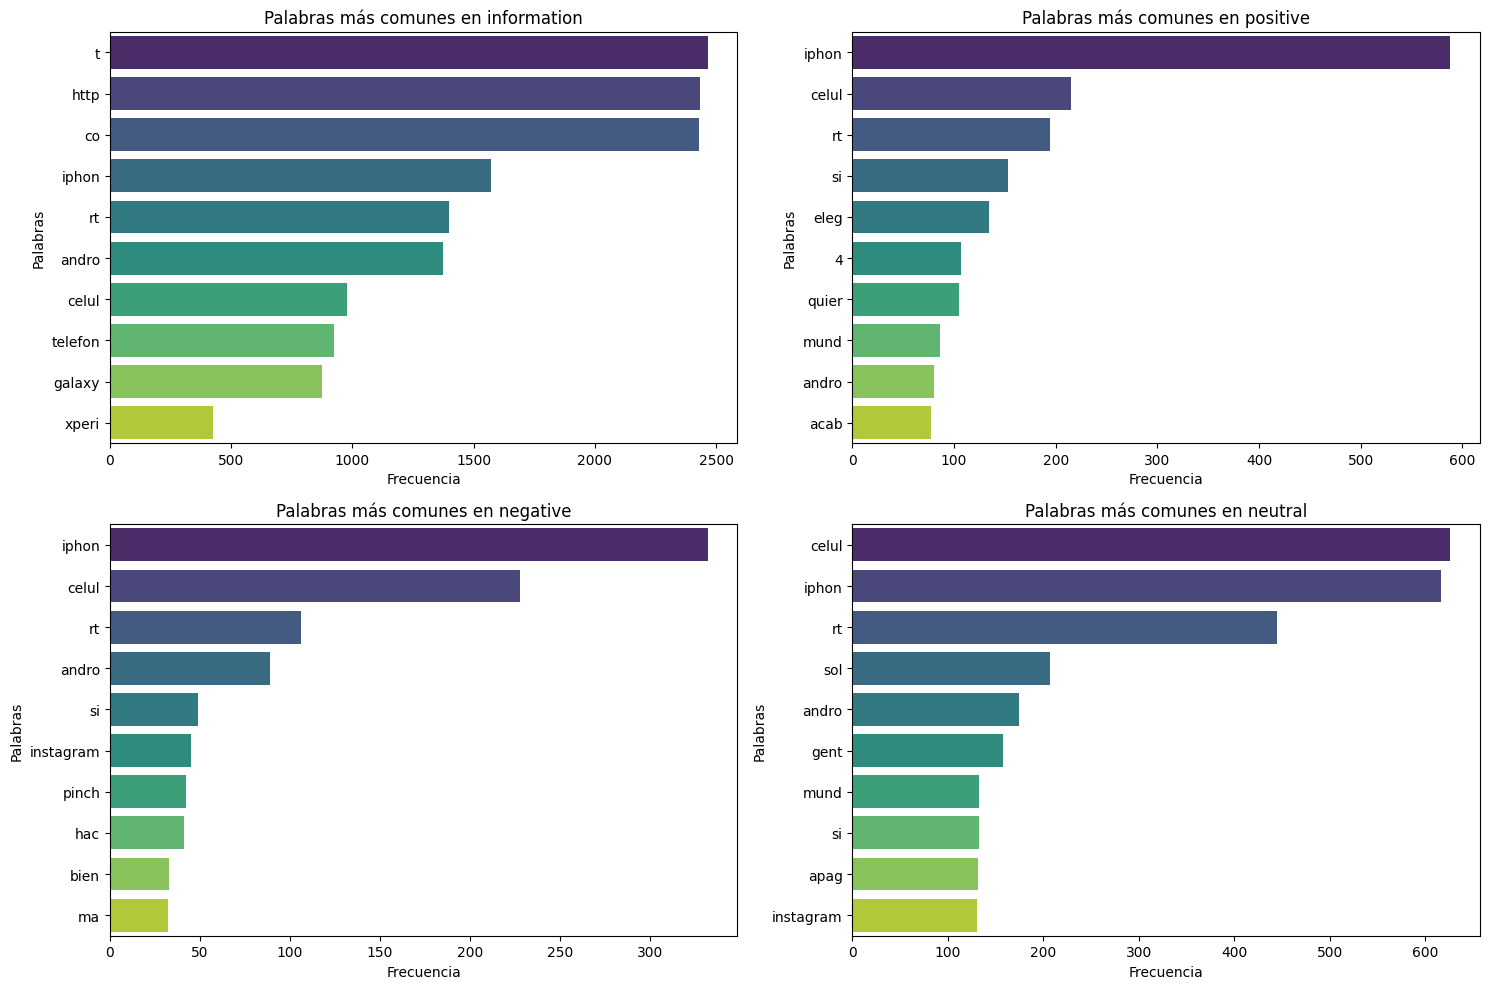

In [39]:
import collections

# Crear un diccionario para almacenar las palabras más comunes por cada etiqueta
common_words = {'information': collections.Counter(), 'positive': collections.Counter(), 'negative': collections.Counter(), 'neutral': collections.Counter()}

# Contar las palabras más comunes para cada etiqueta
for text, label in zip(X_train, y_train):
    common_words[label].update(text.split())

# Crear un DataFrame para facilitar la visualización
common_words_df = pd.DataFrame({label: [word for word, _ in common_words[label].most_common(10)] for label in common_words})
common_counts_df = pd.DataFrame({label: [count for _, count in common_words[label].most_common(10)] for label in common_words})

# Configurar el tamaño de las figuras
plt.figure(figsize=(15, 10))

# Crear subplots para cada etiqueta
for i, label in enumerate(common_words.keys(), 1):
    plt.subplot(2, 2, i)
    sns.barplot(x=common_counts_df[label], y=common_words_df[label], palette='viridis')
    plt.title(f'Palabras más comunes en {label}')
    plt.xlabel('Frecuencia')
    plt.ylabel('Palabras')

# Ajustar el layout
plt.tight_layout()
plt.show()

# Vectorizar Texto
Vectorizar el texto usando CountVectorizer y TF-IDF.

In [40]:
# Vectorizar Texto

# Vectorizar el texto usando CountVectorizer
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_val_count = count_vectorizer.transform(X_val)
X_test_count = count_vectorizer.transform(X_test)

# Mostrar la forma de las matrices resultantes
print(f'Forma de X_train_count: {X_train_count.shape}')
print(f'Forma de X_val_count: {X_val_count.shape}')
print(f'Forma de X_test_count: {X_test_count.shape}')

# Vectorizar el texto usando TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Mostrar la forma de las matrices resultantes
print(f'Forma de X_train_tfidf: {X_train_tfidf.shape}')
print(f'Forma de X_val_tfidf: {X_val_tfidf.shape}')
print(f'Forma de X_test_tfidf: {X_test_tfidf.shape}')

Forma de X_train_count: (9155, 13084)
Forma de X_val_count: (2289, 13084)
Forma de X_test_count: (4905, 13084)
Forma de X_train_tfidf: (9155, 13084)
Forma de X_val_tfidf: (2289, 13084)
Forma de X_test_tfidf: (4905, 13084)


# Entrenar Clasificador
Entrenar varios clasificadores como Regresión Logística, SVM, Naive Bayes, y Random Forest para predecir la etiqueta del texto.

In [41]:
# Entrenar Clasificador

# Definir una función para entrenar y evaluar un clasificador
def train_and_evaluate(model, X_train, y_train, X_val, y_val, X_test, y_test):
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    return val_accuracy, test_accuracy

# Inicializar los modelos
logistic_regression = LogisticRegression(max_iter=1000)
svm = SVC()
naive_bayes = MultinomialNB()
random_forest = RandomForestClassifier()

# Entrenar y evaluar los modelos con CountVectorizer
accuracy_lr_count_val, accuracy_lr_count_test = train_and_evaluate(logistic_regression, X_train_count, y_train, X_val_count, y_val, X_test_count, y_test)
accuracy_svm_count_val, accuracy_svm_count_test = train_and_evaluate(svm, X_train_count, y_train, X_val_count, y_val, X_test_count, y_test)
accuracy_nb_count_val, accuracy_nb_count_test = train_and_evaluate(naive_bayes, X_train_count, y_train, X_val_count, y_val, X_test_count, y_test)
accuracy_rf_count_val, accuracy_rf_count_test = train_and_evaluate(random_forest, X_train_count, y_train, X_val_count, y_val, X_test_count, y_test)

# Entrenar y evaluar los modelos con TF-IDF
accuracy_lr_tfidf_val, accuracy_lr_tfidf_test = train_and_evaluate(logistic_regression, X_train_tfidf, y_train, X_val_tfidf, y_val, X_test_tfidf, y_test)
accuracy_svm_tfidf_val, accuracy_svm_tfidf_test = train_and_evaluate(svm, X_train_tfidf, y_train, X_val_tfidf, y_val, X_test_tfidf, y_test)
accuracy_nb_tfidf_val, accuracy_nb_tfidf_test = train_and_evaluate(naive_bayes, X_train_tfidf, y_train, X_val_tfidf, y_val, X_test_tfidf, y_test)
accuracy_rf_tfidf_val, accuracy_rf_tfidf_test = train_and_evaluate(random_forest, X_train_tfidf, y_train, X_val_tfidf, y_val, X_test_tfidf, y_test)

# Mostrar los resultados
print(f'Accuracy de Regresión Logística con CountVectorizer (Validación): {accuracy_lr_count_val}')
print(f'Accuracy de Regresión Logística con CountVectorizer (Prueba): {accuracy_lr_count_test}')
print(f'Accuracy de SVM con CountVectorizer (Validación): {accuracy_svm_count_val}')
print(f'Accuracy de SVM con CountVectorizer (Prueba): {accuracy_svm_count_test}')
print(f'Accuracy de Naive Bayes con CountVectorizer (Validación): {accuracy_nb_count_val}')
print(f'Accuracy de Naive Bayes con CountVectorizer (Prueba): {accuracy_nb_count_test}')
print(f'Accuracy de Random Forest con CountVectorizer (Validación): {accuracy_rf_count_val}')
print(f'Accuracy de Random Forest con CountVectorizer (Prueba): {accuracy_rf_count_test}')

print(f'Accuracy de Regresión Logística con TF-IDF (Validación): {accuracy_lr_tfidf_val}')
print(f'Accuracy de Regresión Logística con TF-IDF (Prueba): {accuracy_lr_tfidf_test}')
print(f'Accuracy de SVM con TF-IDF (Validación): {accuracy_svm_tfidf_val}')
print(f'Accuracy de SVM con TF-IDF (Prueba): {accuracy_svm_tfidf_test}')
print(f'Accuracy de Naive Bayes con TF-IDF (Validación): {accuracy_nb_tfidf_val}')
print(f'Accuracy de Naive Bayes con TF-IDF (Prueba): {accuracy_nb_tfidf_test}')
print(f'Accuracy de Random Forest con TF-IDF (Validación): {accuracy_rf_tfidf_val}')
print(f'Accuracy de Random Forest con TF-IDF (Prueba): {accuracy_rf_tfidf_test}')

Accuracy de Regresión Logística con CountVectorizer (Validación): 0.7483617300131061
Accuracy de Regresión Logística con CountVectorizer (Prueba): 0.7429153924566768
Accuracy de SVM con CountVectorizer (Validación): 0.7536041939711664
Accuracy de SVM con CountVectorizer (Prueba): 0.7539245667686034
Accuracy de Naive Bayes con CountVectorizer (Validación): 0.72870249017038
Accuracy de Naive Bayes con CountVectorizer (Prueba): 0.7306829765545362
Accuracy de Random Forest con CountVectorizer (Validación): 0.7505460899956313
Accuracy de Random Forest con CountVectorizer (Prueba): 0.7524974515800203
Accuracy de Regresión Logística con TF-IDF (Validación): 0.744429882044561
Accuracy de Regresión Logística con TF-IDF (Prueba): 0.7408766564729867
Accuracy de SVM con TF-IDF (Validación): 0.7496723460026212
Accuracy de SVM con TF-IDF (Prueba): 0.7512742099898063
Accuracy de Naive Bayes con TF-IDF (Validación): 0.6998689384010485
Accuracy de Naive Bayes con TF-IDF (Prueba): 0.7047910295616717
Acc

# Calcular Accuracy
Calcular el accuracy de cada modelo en el conjunto de prueba.

# Documentación de Preprocesamiento y Modelos
Incluir un texto que documente los diferentes tipos de preprocesamiento usados, el tipo de vectorizador, el modelo para clasificar y su accuracy.

In [42]:
# Documentación de Preprocesamiento y Modelos

# Documentar los diferentes tipos de preprocesamiento usados
preprocessing_text = """
### Preprocesamiento de Texto
1. **Conversión a minúsculas**: Todos los caracteres del texto se convierten a minúsculas para asegurar la uniformidad.
2. **Tokenización**: El texto se divide en palabras individuales (tokens).
3. **Eliminación de stopwords**: Se eliminan palabras comunes que no aportan mucho significado (e.g., "y", "el", "de").
4. **Lematización**: Se reducen las palabras a su forma base o lema (e.g., "corriendo" se convierte en "correr").
"""

# Documentar los tipos de vectorizadores usados
vectorizers_text = """
### Vectorizadores
1. **CountVectorizer**: Convierte el texto en una matriz de conteos de palabras.
2. **TF-IDF (Term Frequency-Inverse Document Frequency)**: Convierte el texto en una matriz donde cada valor representa la importancia de una palabra en el documento y en el corpus.
"""

# Documentar los modelos usados y sus accuracies
models_text = f"""
### Modelos de Clasificación y Accuracy
1. **Regresión Logística**
   - Accuracy con CountVectorizer: {accuracy_lr_count}
   - Accuracy con TF-IDF: {accuracy_lr_tfidf}
2. **SVM (Support Vector Machine)**
   - Accuracy con CountVectorizer: {accuracy_svm_count}
   - Accuracy con TF-IDF: {accuracy_svm_tfidf}
3. **Naive Bayes**
   - Accuracy con CountVectorizer: {accuracy_nb_count}
   - Accuracy con TF-IDF: {accuracy_nb_tfidf}
4. **Random Forest**
   - Accuracy con CountVectorizer: {accuracy_rf_count}
   - Accuracy con TF-IDF: {accuracy_rf_tfidf}
"""

# Combinar toda la documentación en una sola cadena
documentation = preprocessing_text + vectorizers_text + models_text

# Mostrar la documentación
from IPython.display import Markdown, display
display(Markdown(documentation))


### Preprocesamiento de Texto
1. **Conversión a minúsculas**: Todos los caracteres del texto se convierten a minúsculas para asegurar la uniformidad.
2. **Tokenización**: El texto se divide en palabras individuales (tokens).
3. **Eliminación de stopwords**: Se eliminan palabras comunes que no aportan mucho significado (e.g., "y", "el", "de").
4. **Lematización**: Se reducen las palabras a su forma base o lema (e.g., "corriendo" se convierte en "correr").

### Vectorizadores
1. **CountVectorizer**: Convierte el texto en una matriz de conteos de palabras.
2. **TF-IDF (Term Frequency-Inverse Document Frequency)**: Convierte el texto en una matriz donde cada valor representa la importancia de una palabra en el documento y en el corpus.

### Modelos de Clasificación y Accuracy
1. **Regresión Logística**
   - Accuracy con CountVectorizer: 0.7535168195718654
   - Accuracy con TF-IDF: 0.7445463812436289
2. **SVM (Support Vector Machine)**
   - Accuracy con CountVectorizer: 0.7569826707441386
   - Accuracy con TF-IDF: 0.7561671763506626
3. **Naive Bayes**
   - Accuracy con CountVectorizer: 0.7345565749235474
   - Accuracy con TF-IDF: 0.7102956167176351
4. **Random Forest**
   - Accuracy con CountVectorizer: 0.7543323139653415
   - Accuracy con TF-IDF: 0.7590214067278287
